In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display
import csv
import seaborn as sn
from lib.confusion_matrix_pretty_print import pretty_plot_confusion_matrix

In [74]:
def render_image(width, height, filepath):
    with open(filepath.lower(), 'rb') as f:
        tmp = [i+1 for i in f.read()[:32768]]
        tmp = tmp + [0]*(width - len(tmp) % width)

        tmp = np.reshape(np.array(tmp), (-1, width)).astype(np.uint8)
        
        img = Image.fromarray(tmp, mode='L')
        display(img)
        img1=img.resize((width, height), Image.NEAREST)
        display(img1)
        img2=img.resize((width, height), Image.BILINEAR)
        display(img2)
        img3=img.resize((width, height), Image.LANCZOS)
        display(img3)
        
        res = np.array(img)

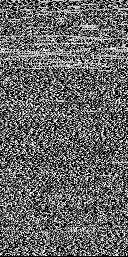

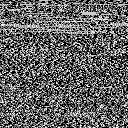

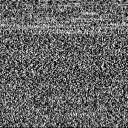

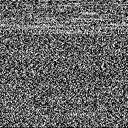

In [75]:
render_image(128, 128, '/Users/momo/prog/research/MalConv-Pytorch/data/train/05Kps4iFw8mOLJZQrb1H')

In [93]:
root_path = '/Users/momo/prog/research/MalEXP/'
gtruth_file = '/Users/momo/prog/research/MalEXP/ground_truth.csv'

def confusion_matrix(gr_file, exp_name):
    pred_file = '{0}pred/{1}.pred'.format(root_path, exp_name)
    gt = {}
    with open(gr_file) as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for r in reader:
            gt[r[0]] = int(r[1])
    cmatrix = np.zeros((9, 9), dtype=int)
    with open(pred_file) as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for r in reader:
            cmatrix[gt[r[0]]][int(r[1])] += 1
    df_cm = pd.DataFrame(cmatrix, index = [i for i in "012345678"], columns = [i for i in "012345678"])
    pretty_plot_confusion_matrix(df_cm, figsize=[8, 8])

def learning_curve(steps, train, valid, label):
    plt.figure(figsize=(5, 5))
    plt.xlabel("Steps")
    plt.ylabel(label)
    plt.grid()
    plt.plot(steps, train, 'r', label='Training {0}'.format(label))
    plt.plot(steps, valid, 'g', label='Valid {0}'.format(label))
    plt.legend(loc="best")
    plt.show()

def show_exp_result(exp_name, gr_file=gtruth_file):
    # show confusion matrix
    confusion_matrix(gr_file, exp_name)
    
    # show learning curve
    log_file = '{0}log/{1}.log'.format(root_path, exp_name)
    steps = []
    train_loss = []
    train_acc = []
    valid_loss = []
    valid_acc = []
    with open(log_file) as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        next(reader)
        for r in reader:
            steps.append(int(r[0]))
            train_loss.append(float(r[1]))
            train_acc.append(float(r[2]))
            valid_loss.append(float(r[3]))
            valid_acc.append(float(r[4]))
    learning_curve(steps, train_loss, valid_loss, "Loss")
    learning_curve(steps, train_acc, valid_acc, "Accuracy")

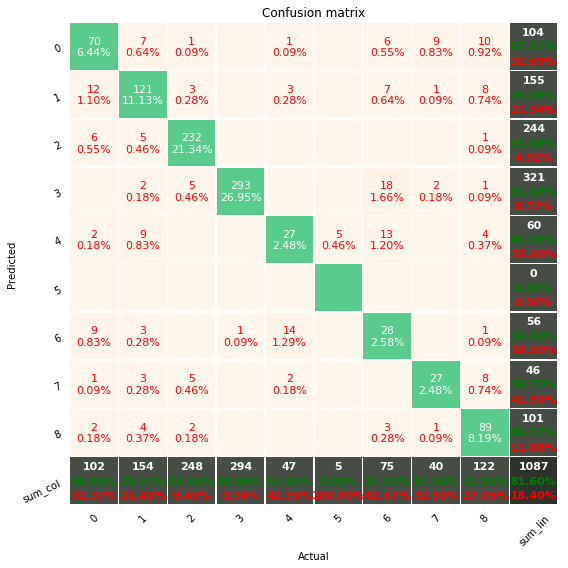

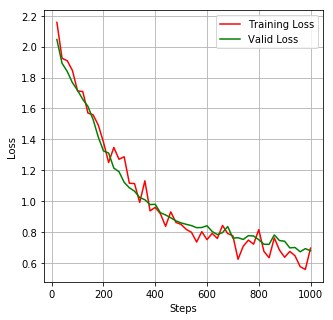

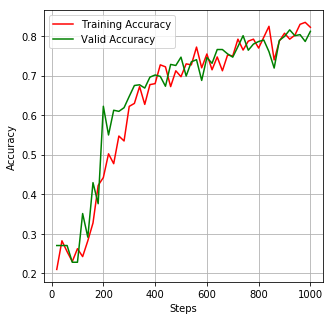

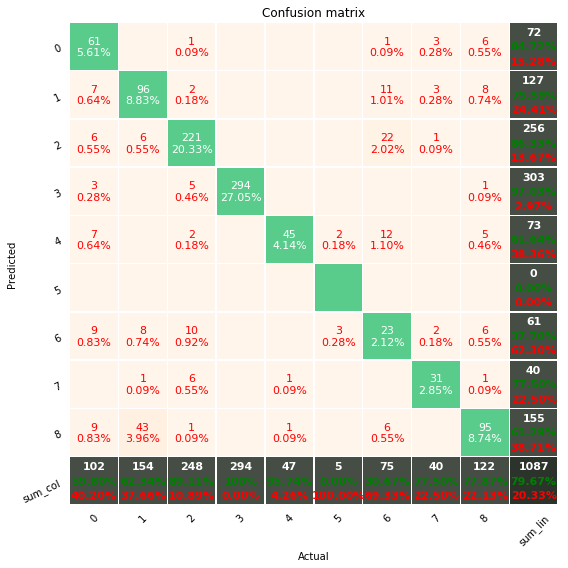

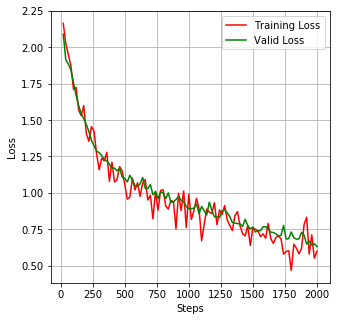

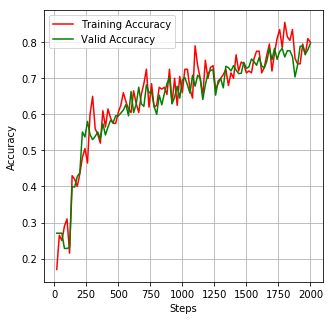

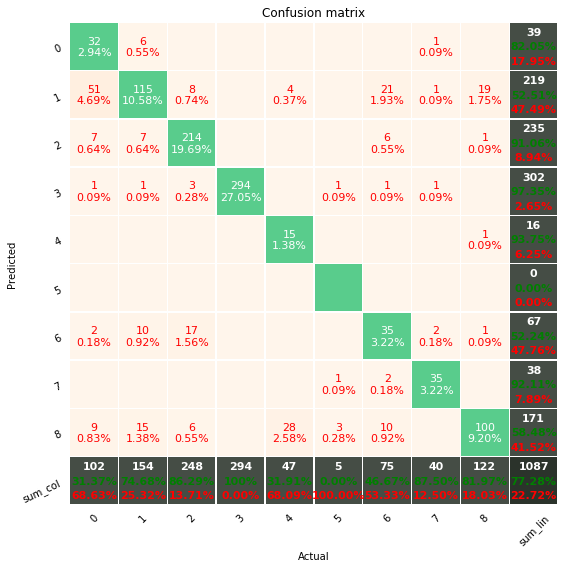

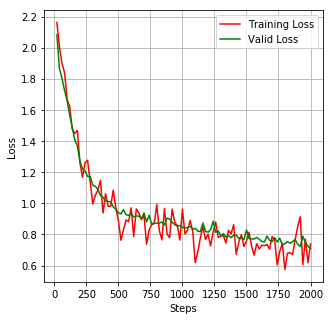

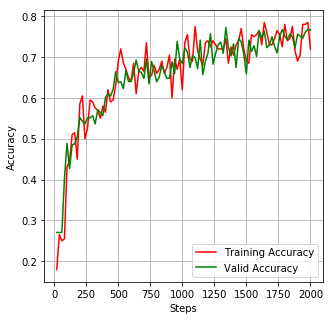

In [94]:
show_exp_result('convnet500')
show_exp_result('convnet2m')
show_exp_result('convnet2m_keepall')

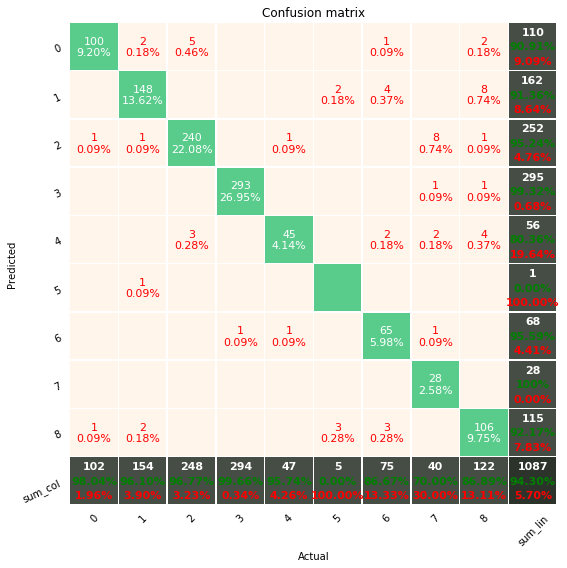

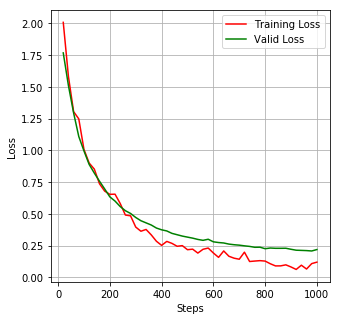

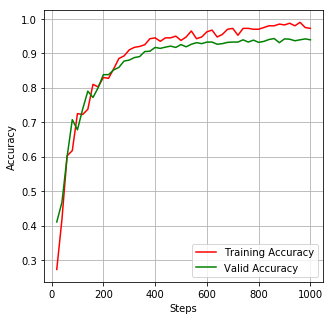

In [95]:
show_exp_result('multiclass')

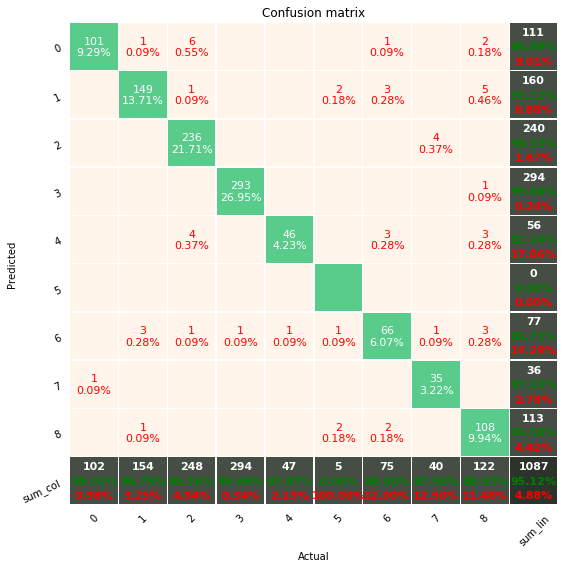

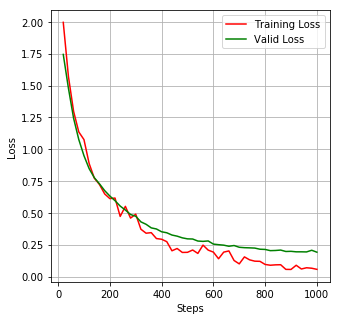

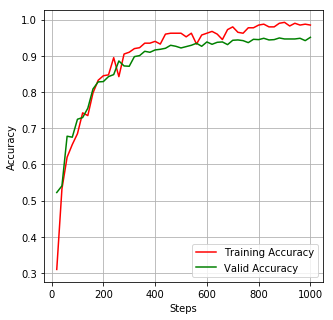

In [96]:
show_exp_result('normmaxpoolt')